# Libraries

In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [2]:
sales = pd.read_parquet("sale_data.parquet")
cities = gp.read_file("zip://gadm36_TUR_1.zip")

In [3]:
cities_sorted = sales["City"].unique()
cities_sorted.sort()
cities_sorted

array(['Adana', 'Adıyaman', 'Afyon', 'Afyonkarahisar', 'Aksaray',
       'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın',
       'Ağrı', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik',
       'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Denizli',
       'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum',
       'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkâri',
       'Hatay', 'Isparta', 'Iğdır', 'Kahramanmaraş', 'Karabük', 'Karaman',
       'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kocaeli', 'Konya',
       'Kütahya', 'Kırklareli', 'Kırıkkale', 'Kırşehir', 'Malatya',
       'Manisa', 'Mardin', 'Mersin', 'Mersin (İçel)', 'Muğla', 'Muş',
       'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
       'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat',
       'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat',
       'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum', 'İstanbul', 'İzmir',
       'Şanlıurfa', 'Şırnak'], dtype=ob

In [4]:
errors = list((set(cities_sorted) - set(cities["NAME_1"])).union(set(cities["NAME_1"]) - set(cities_sorted)))
print(errors)

['Kırklareli', 'Sirnak', 'İzmir', 'Mugla', 'Usak', 'Nevsehir', 'Ağrı', 'Balıkesir', 'Tekirdag', 'Balikesir', 'Sanliurfa', 'Hakkari', 'Muş', 'Niğde', 'Çankiri', 'Kirsehir', 'Zinguldak', 'Mus', 'Kinkkale', 'Nevşehir', 'Adıyaman', 'Muğla', 'Diyarbakır', 'Eskişehir', 'Kahramanmaraş', 'Zonguldak', 'Aydin', 'Gümüshane', 'Uşak', 'Kırşehir', 'Diyarbakir', 'Istanbul', 'Çankırı', 'K. Maras', 'Şırnak', 'Agri', 'Adiyaman', 'Eskisehir', 'Gümüşhane', 'Mersin (İçel)', 'Nigde', 'Şanlıurfa', 'Kırıkkale', 'Kirklareli', 'İstanbul', 'Aydın', 'Tekirdağ', 'Izmir', 'Afyonkarahisar', 'Hakkâri']


In [5]:
cities["NAME_1"].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankiri', 'Çorum',
       'Denizli', 'Diyarbakir', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gümüshane',
       'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'Istanbul', 'Izmir',
       'K. Maras', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri',
       'Kilis', 'Kinkkale', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya',
       'Kütahya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Mugla', 'Mus',
       'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
       'Samsun', 'Sanliurfa', 'Siirt', 'Sinop', 'Sirnak', 'Sivas',
       'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Usak', 'Van', 'Yalova',
       'Yozgat', 'Zinguldak'], dtype=object)

In [6]:
cities_mapping = {'Adiyaman': "Adıyaman", 'Afyon':"Afyonkarahisar", 'Aydin':"Aydın",
                  'Agri':"Ağrı", 'Balikesir': "Balıkesir", 'Çankiri': "Çankırı",
                  'Diyarbakir':"Diyarbakır", 'Eskisehir':"Eskişehir", 'Gümüshane':"Gümüşhane",
                  'Hakkâri':"Hakkari", 'Istanbul':"İstanbul", 'Izmir':"İzmir", 'K. Maras':"Kahramanmaraş",
                  'Kinkkale':"Kırıkkale", 'Kirklareli':"Kırklareli", 'Kirsehir':"Kırşehir",
                  'Mersin (İçel)':"Mersin", 'Mugla':"Muğla", 'Mus':"Muş", 'Nevsehir':"Nevşehir",
                  'Nigde':"Niğde", 'Sanliurfa':"Şanlıurfa", 'Sirnak':"Şırnak", 'Tekirdag':"Tekirdağ",
                  'Usak':"Uşak", 'Zinguldak':"Zonguldak"}

In [7]:
for i in errors:
    if (i not in cities_mapping.keys()) and (i not in cities_mapping.values()):
        print(i)

# No mismatches left

In [8]:
sales = sales.replace({"City": cities_mapping})
cities = cities.replace({"NAME_1": cities_mapping})
cities = cities.rename(columns={'NAME_1': 'City'})

In [9]:
sales["PromoRatio"] = sales.FreeQty/(sales.PaidQty+sales.FreeQty)

In [10]:
# Filter out the unpromoted sales

sales = sales[sales["FreeQty"] != 0]
sales

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,PromoRatio
0,2023-01-02,2873114,2879223,2878715,615,38,Kütahya,MERKEZ,430002,24,12,0.333333
1,2023-01-16,2872993,2879223,2878715,615,38,Kütahya,ALTINTAŞ,430101,7,3,0.300000
2,2023-01-18,2918671,2879223,2878715,615,38,Afyonkarahisar,MERKEZ,30002,7,3,0.300000
3,2023-01-19,2919833,2879223,2878715,615,38,Uşak,MERKEZ,640001,7,3,0.300000
4,2023-01-02,2873114,2879223,2878715,616,38,Kütahya,MERKEZ,430002,24,12,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
11422641,2022-12-23,2887352,2927450,2927451,521,21,Şanlıurfa,HALİLİYE,630001,15,1,0.062500
11422644,2022-12-03,2887362,2927450,2927451,470,39,Şanlıurfa,HALİLİYE,630001,15,1,0.062500
11422726,2022-12-01,2916860,2927450,2927451,333,16,Şanlıurfa,EYYÜBİYE,630001,6,1,0.142857
11422738,2022-12-06,2919026,2927450,2927451,595,32,Şanlıurfa,HALİLİYE,630001,7,1,0.125000


In [11]:
sales_groupby_city = sales[["City", "PaidQty", "FreeQty", "PromoRatio"]].groupby(['City']).mean()
sales_groupby_city.head()

,PaidQty,FreeQty,PromoRatio
City,,,
Adana,13.973924,3.050771,0.170346
Adıyaman,14.386344,2.193344,0.134447
Afyonkarahisar,16.330247,3.734953,0.165907
Aksaray,17.352738,4.299601,0.181058
Amasya,13.654268,2.617735,0.161553


In [12]:
merged_data = cities[["City", "geometry"]].merge(sales_groupby_city, on='City')

In [13]:
merged_data.head()

,City,geometry,PaidQty,FreeQty,PromoRatio
0,Adana,"MULTIPOLYGON (((35.20958 36.67875, 35.20958 36...",13.973924,3.050771,0.170346
1,Adıyaman,"POLYGON ((38.68339 37.60323, 38.66182 37.59428...",14.386344,2.193344,0.134447
2,Afyonkarahisar,"POLYGON ((30.18261 37.90116, 30.18878 37.89117...",16.330247,3.734953,0.165907
3,Ağrı,"POLYGON ((43.71635 39.37020, 43.70746 39.36575...",12.260816,3.101442,0.193932
4,Aksaray,"POLYGON ((34.39513 38.19467, 34.39626 38.18270...",17.352738,4.299601,0.181058


# Visualizations

<Axes: >

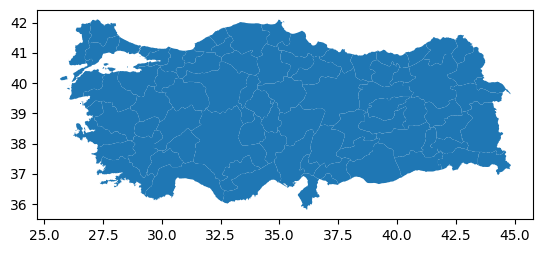

In [14]:
merged_data.plot()

Text(0.5, 1.0, 'Average Promotion Ratio per City')

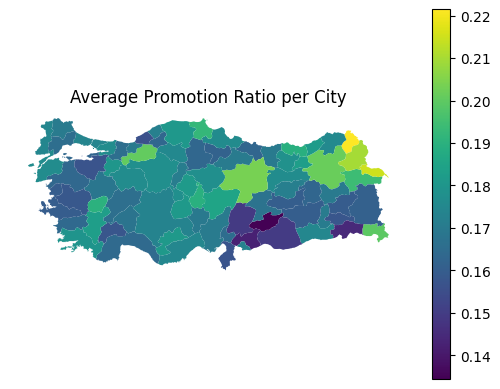

In [20]:
ax = merged_data.plot(column='PromoRatio', legend=True)
ax.set_axis_off()
ax.set_title("Average Promotion Ratio per City")